In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def f(x):
    if (x > 0):
        return x**2
    return 1 + x**2

In [101]:
def f_arr(x):
    fx = np.zeros(len(x))
    for i in range(len(x)):
        x_i = x[i]
        fx[i] = f(x_i)
    return fx

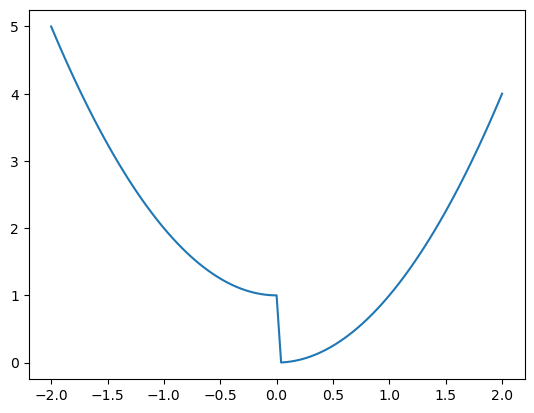

In [102]:
x = np.linspace(-2,2,101)
fx = f_arr(x)
dx = x[1] - x[0]
plt.plot(x,fx)

In [104]:
i = 61
fx_approx1 = 1/3 * fx[i-2] - 7/6 * fx[i-1] + 11/6 * fx[i]
fx_approx2 = -1/6 * fx[i-1] + 5/6 * fx[i] + 1/3 * fx[i+1]
fx_approx3 = 1/3 * fx[i] + 5/6 * fx[i+1] - 1/6 * fx[i+2]

In [105]:
x_half = (x[i] + x[i+1])/2

In [106]:
print(f(x_half) - fx_approx1)
print(f(x_half) - fx_approx2)
print(f(x_half) - fx_approx3)

0.00013333333333331865
0.00013333333333331865
0.0001333333333332909


In [108]:
dx**3

6.400000000000017e-05

We start with Third Order ENO

First, we wish to find $u_{i+\frac{1}{2}}$. We require that $x_{i+\frac{1}{2}}$ and $x_{i-\frac{1}{2}}$ are included in the stencil. So we take the initial stencil

$$
    \tilde{S}_{2} = \left\{x_{i-\frac{1}{2}}, x_{i+\frac{1}{2}}\right\}
$$

Then we extend in either side to create two candidate stencils:

$$
    \tilde{S}^{L}_{3} = \left\{x_{i-\frac{3}{2}}, x_{i-\frac{1}{2}}, x_{i+\frac{1}{2}}\right\}, \\
    \tilde{S}^{R}_{3} = \left\{x_{i-\frac{1}{2}}, x_{i+\frac{1}{2}}, x_{i+\frac{3}{2}}\right\}.
$$

We then take the absolute value of the divided differences as the basis for which one we choose. So, if

$$
    \left|U[x_{i-\frac{3}{2}}, x_{i-\frac{1}{2}}, x_{i+\frac{1}{2}}]\right| < \left|U[x_{i-\frac{1}{2}}, x_{i-\frac{1}{2}}, x_{i+\frac{3}{2}}]\right|
$$

Then we go with $\tilde{S}^{L}_{3}$, else we go with $\tilde{S}^{R}_{3}$.

Here the divided differences are acquired recursively as

$$
U\left[x_{i-\frac{1}{2}}, x_{i+\frac{1}{2}}\right] = \frac{U\left(x_{i+\frac{1}{2}}\right) - U\left(x_{i+\frac{1}{2}}\right)}{\Delta x}
$$